<a href="https://colab.research.google.com/github/eileenjang/deeplearning_practice/blob/main/pytorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#git branch test

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable


In [ ]:
no = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
area = [3400,4500,6500,7700,6600,3500,4300,3700,8700,9000,9100,9200,8200,8800,8400,8300,7900,7400,7100,6400]
price = [1500,2300,2777,3567,2799,1633,2111,1700,4333,4500,4551,4560,4200,4304,4000,4230,3700,3300,3000,2600]
data = pd.DataFrame({"No":no,"Area":area,"Price":price})
data.head()


,No,Area,Price
0,1,3400,1500
1,2,4500,2300
2,3,6500,2777
3,4,7700,3567
4,5,6600,2799


In [ ]:
index = [1,2,3]
area_size = [1200, 1350, 5400]
area_value = [571, 643, 2570]
test_data = pd.DataFrame({"No":index, "Area": area_size, "Expected Value": area_value})
 
test_data.head()


,No,Area,Expected Value
0,1,1200,571
1,2,1350,643
2,3,5400,2570


In [ ]:
data = np.array(data,dtype=np.float32)
x_train = data[: ,1:2]
y_train = data[: ,2:3]
 
test_data = np.array(test_data,dtype=np.float32)
x_test = test_data[:,1:2]
y_test = test_data[:, 2:3]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

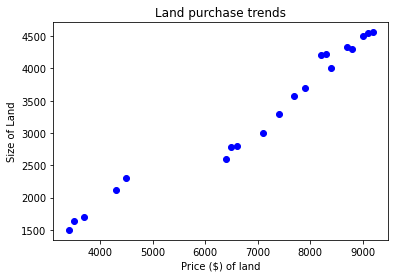

In [ ]:
plt.plot(x_train, y_train, "bo")
plt.xlabel("Price ($) of land")
plt.ylabel("Size of Land")
plt.title("Land purchase trends")
plt


w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

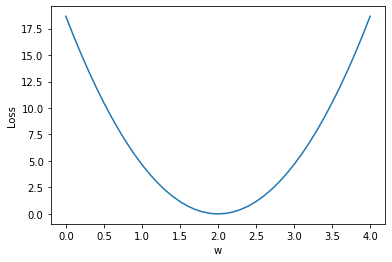

In [ ]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0  # a random guess: random value, 1.0

# our model for the forward pass
def forward(x):
   return x * w

# Loss function
def loss(x, y):
   y_pred = forward(x)
   return (y_pred - y) * (y_pred - y)

w_list = []
mse_list = []
for w in np.arange(0.0, 4.1, 0.1):
   print("w=", w)
   l_sum = 0
   for x_val, y_val in zip(x_data, y_data):
       y_pred_val = forward(x_val)
       l = loss(x_val, y_val)
       l_sum += l
       print("\t", x_val, y_val, y_pred_val, l)
   print("MSE=", l_sum / 3)
   w_list.append(w)
   mse_list.append(l_sum / 3)

plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()


In [ ]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0  # a random guess: random value

# our model forward pass
def forward(x):
   return x * w


# Loss function
def loss(x, y):
   y_pred = forward(x)
   return (y_pred - y) * (y_pred - y)


# compute gradient
def gradient(x, y):  # d_loss/d_w
   return 2 * x * (x * w - y)


In [ ]:
print("predict (before training)",  4, forward(4))

# Training loop
for epoch in range(100):
   for x_val, y_val in zip(x_data, y_data):
       grad = gradient(x_val, y_val)
       w = w - 0.01 * grad
       print("\tgrad: ", x_val, y_val, grad)
       l = loss(x_val, y_val)

   print("progress:", epoch, "w=", w, "loss=", l)

# After training
print("predict (after training)",  "4 hours", forward(4))


predict (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.84
	grad:  3.0 6.0 -16.2288
progress: 0 w= 1.260688 loss= 4.919240100095999
	grad:  1.0 2.0 -1.478624
	grad:  2.0 4.0 -5.796206079999999
	grad:  3.0 6.0 -11.998146585599997
progress: 1 w= 1.453417766656 loss= 2.688769240265834
	grad:  1.0 2.0 -1.093164466688
	grad:  2.0 4.0 -4.285204709416961
	grad:  3.0 6.0 -8.87037374849311
progress: 2 w= 1.5959051959019805 loss= 1.4696334962911515
	grad:  1.0 2.0 -0.8081896081960389
	grad:  2.0 4.0 -3.1681032641284723
	grad:  3.0 6.0 -6.557973756745939
progress: 3 w= 1.701247862192685 loss= 0.8032755585999681
	grad:  1.0 2.0 -0.59750427561463
	grad:  2.0 4.0 -2.3422167604093502
	grad:  3.0 6.0 -4.848388694047353
progress: 4 w= 1.7791289594933983 loss= 0.43905614881022015
	grad:  1.0 2.0 -0.44174208101320334
	grad:  2.0 4.0 -1.7316289575717576
	grad:  3.0 6.0 -3.584471942173538
progress: 5 w= 1.836707389300983 loss= 0.2399802903801062
	grad:  1.0 2.0 -0.3265852213980338
	grad:  2

In [ ]:
import torch
from torch.autograd import Variable

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = Variable(torch.Tensor([1.0]),  requires_grad=True)  # Any random value


In [ ]:

# our model forward pass
def forward(x):
   return x * w

# Loss function
def loss(x, y):
   y_pred = forward(x)
   return (y_pred - y) * (y_pred - y)

# Before training
print("predict (before training)",  4, forward(4).data[0])


predict (before training) 4 tensor(4.)


In [ ]:
# Training loop
for epoch in range(10):
   for x_val, y_val in zip(x_data, y_data):
       l = loss(x_val, y_val)
       l.backward()
       print("\tgrad: ", x_val, y_val, w.grad.data[0])
       w.data = w.data - 0.01 * w.grad.data

       # Manually zero the gradients after updating weights
       w.grad.data.zero_()

   print("progress:", epoch, l.data[0])

# After training
print("predict (after training)",  4, forward(4).data[0])


	grad:  1.0 2.0 tensor(-2.)
	grad:  2.0 4.0 tensor(-7.8400)
	grad:  3.0 6.0 tensor(-16.2288)
progress: 0 tensor(7.3159)
	grad:  1.0 2.0 tensor(-1.4786)
	grad:  2.0 4.0 tensor(-5.7962)
	grad:  3.0 6.0 tensor(-11.9981)
progress: 1 tensor(3.9988)
	grad:  1.0 2.0 tensor(-1.0932)
	grad:  2.0 4.0 tensor(-4.2852)
	grad:  3.0 6.0 tensor(-8.8704)
progress: 2 tensor(2.1857)
	grad:  1.0 2.0 tensor(-0.8082)
	grad:  2.0 4.0 tensor(-3.1681)
	grad:  3.0 6.0 tensor(-6.5580)
progress: 3 tensor(1.1946)
	grad:  1.0 2.0 tensor(-0.5975)
	grad:  2.0 4.0 tensor(-2.3422)
	grad:  3.0 6.0 tensor(-4.8484)
progress: 4 tensor(0.6530)
	grad:  1.0 2.0 tensor(-0.4417)
	grad:  2.0 4.0 tensor(-1.7316)
	grad:  3.0 6.0 tensor(-3.5845)
progress: 5 tensor(0.3569)
	grad:  1.0 2.0 tensor(-0.3266)
	grad:  2.0 4.0 tensor(-1.2802)
	grad:  3.0 6.0 tensor(-2.6500)
progress: 6 tensor(0.1951)
	grad:  1.0 2.0 tensor(-0.2414)
	grad:  2.0 4.0 tensor(-0.9465)
	grad:  3.0 6.0 tensor(-1.9592)
progress: 7 tensor(0.1066)
	grad:  1.0 2.0 te

In [ ]:
from torch import nn
import torch
from torch import tensor

x_data = tensor([[1.0], [2.0], [3.0]])
y_data = tensor([[2.0], [4.0], [6.0]])


class Model(nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        y_pred = self.linear(x)
        return y_pred


# our model
model = Model()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(500):
    # 1) Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # 2) Compute and print loss
    loss = criterion(y_pred, y_data)
    print(f'Epoch: {epoch} | Loss: {loss.item()} ')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# After training
hour_var = tensor([[4.0]])
y_pred = model(hour_var)
print("Prediction (after training)",  4, model(hour_var).data[0][0].item())

Epoch: 0 | Loss: 53.13786315917969 
Epoch: 1 | Loss: 23.672096252441406 
Epoch: 2 | Loss: 10.554533004760742 
Epoch: 3 | Loss: 4.714731216430664 
Epoch: 4 | Loss: 2.1147851943969727 
Epoch: 5 | Loss: 0.9571337699890137 
Epoch: 6 | Loss: 0.44155430793762207 
Epoch: 7 | Loss: 0.21181075274944305 
Epoch: 8 | Loss: 0.109316885471344 
Epoch: 9 | Loss: 0.06347334384918213 
Epoch: 10 | Loss: 0.0428522452712059 
Epoch: 11 | Loss: 0.03346260264515877 
Epoch: 12 | Loss: 0.02907596156001091 
Epoch: 13 | Loss: 0.026919318363070488 
Epoch: 14 | Loss: 0.02575843222439289 
Epoch: 15 | Loss: 0.025043634697794914 
Epoch: 16 | Loss: 0.02453039027750492 
Epoch: 17 | Loss: 0.024109549820423126 
Epoch: 18 | Loss: 0.023732608184218407 
Epoch: 19 | Loss: 0.023378072306513786 
Epoch: 20 | Loss: 0.023036014288663864 
Epoch: 21 | Loss: 0.02270224317908287 
Epoch: 22 | Loss: 0.02237481065094471 
Epoch: 23 | Loss: 0.022052666172385216 
Epoch: 24 | Loss: 0.021735507994890213 
Epoch: 25 | Loss: 0.021423012018203735